In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [26]:
#import the xyz files and get the atoms in a list
CO_O_Ru = pd.read_csv('CO_O_Ru.csv', sep=',', header=None)
print(CO_O_Ru.values)

[[0.00709277 0.9853895020000001 0.820757602 'Ru']
 [0.34229643200000004 0.9877208909999999 0.821810248 'Ru']
 [0.674113367 0.99165528 0.8218475759999999 'Ru']
 [0.010228858 0.234882321 0.8274280909999999 'Ru']
 [0.34663815299999995 0.236744433 0.822079008 'Ru']
 [0.671452808 0.236251828 0.82131752 'Ru']
 [0.019544913 0.487510946 0.822915153 'Ru']
 [0.34137203899999996 0.488880452 0.822198458 'Ru']
 [0.6650049170000001 0.487131858 0.822945015 'Ru']
 [0.008492572 0.74077902 0.819809474 'Ru']
 [0.336915973 0.7408602540000001 0.8201230279999999 'Ru']
 [0.667275991 0.749135613 0.823172715 'Ru']
 [0.016991096 0.223166012 0.8970109620000001 'C']
 [0.023469247999999998 0.21277234399999997 0.9399566690000001 'O']
 [0.785673003 0.5733024489999999 0.8671262740000001 'O']]


In [27]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [28]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO_O_Ru_angs=np.matmul(CO_O_Ru.iloc[:, 0:3],lattice_vectors)
CO_O_Ru_angs = np.array(CO_O_Ru_angs)
print(CO_O_Ru_angs)

[[ 5.52170116  9.46170979 21.9878    ]
 [ 8.32203717  9.48409579 22.01600001]
 [11.10309716  9.52187379 22.01700001]
 [ 1.38718     2.25534    22.1665    ]
 [ 4.19494     2.27322    22.02319999]
 [ 6.89323     2.26849    22.0028    ]
 [ 2.86515     4.68108    22.04560002]
 [ 5.54892     4.69423    22.02640002]
 [ 8.23042     4.67744    22.04640001]
 [ 4.17728999  7.11296    21.9624    ]
 [ 6.90877     7.11374    21.9708    ]
 [ 9.70178     7.1932     22.05250001]
 [ 1.37846     2.14284    24.0306    ]
 [ 1.37471001  2.04304    25.1811    ]
 [ 9.71155     5.50485    23.23      ]]


In [29]:
#Ready to start iterating?
vertices = np.array([[ 8.31557575,  0.,          0.        ],
                     [ 5.54371717,  9.60199979,  0.        ],
                     [ 0.,          0.,         26.78963917],
                     [ 0.,          0.,          0.        ],
                     [ 13.85929292, 9.60199979,  0.        ],
                     [ 5.54371717,  9.60199979, 26.78963917],
                     [ 8.31557575,  0.,         26.78963917],
                     [ 13.85929292, 9.60199979, 26.78963917]])
print(vertices)

[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]
 [ 0.          0.          0.        ]
 [13.85929292  9.60199979  0.        ]
 [ 5.54371717  9.60199979 26.78963917]
 [ 8.31557575  0.         26.78963917]
 [13.85929292  9.60199979 26.78963917]]


In [30]:
# Atomic mass of Ru: 101.07
# Atomic mass C: 12.011
# Atomic mass O: 15.999
# Total atomic mass of cluster: 
total_mass = 101.07*12 + 12.011 + 15.999*2

In [31]:
CO_O_Ru = np.array(CO_O_Ru)
V_ext_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    V_ext = 0
    for j in range(len(CO_O_Ru_angs)):
        distance = np.sum(np.power(CO_O_Ru_angs[j,:] - vertices[i,:],2))
        element = CO_O_Ru[j,3]
        if element == 'Ru':
            charge = 101.07/total_mass
        elif element == 'C':
            charge = 12.011/total_mass
        elif element == 'O':
            charge = 15.999/total_mass
        else:
            charge = 0.0
        V_ext = V_ext + charge/distance
    V_ext_oper[i,i] = V_ext

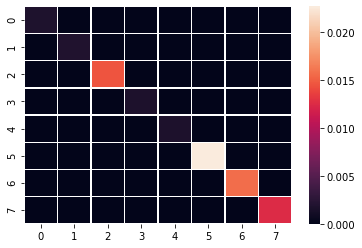

In [32]:
fig = sns.heatmap(V_ext_oper, linewidth=0.5)
plt.savefig('CO_O_Ru_V_ext.png',dpi=300)

In [33]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a first derivative.

In [34]:
E_kin_oper = np.zeros((len(vertices),len(vertices)))

for i in range(len(vertices)):
    V_kin = 0
    #Obtain the distance from one vertex to the next.
    if i < len(vertices) - 1: # valid up until the next to last index
        distance = np.sum(np.power(vertices[i+1,:] - vertices[i,:],2))
    elif i == len(vertices) - 1: # At the last index we have to hop around to the start.
        distance = np.sum(np.power(vertices[0,:] - vertices[i,:],2))
    V_kin = 1/(2*distance)
    if i < len(vertices) - 1: # valid up until the next to last index
        E_kin_oper[i,i] = V_kin
        E_kin_oper[i+1,i+1] = -V_kin #putting in the finite difference
    elif i == len(vertices) - 1:
        E_kin_oper[i,i] = V_kin
        E_kin_oper[0,0] = -V_kin
        

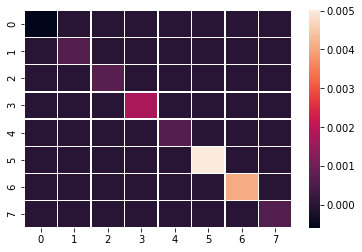

In [35]:
fig = sns.heatmap(E_kin_oper, linewidth=0.5)
plt.savefig('CO_O_Ru_E_kin.png',dpi=300)

In [36]:
V_e_e_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    for j in range(len(vertices)):
        if i != j:
            distance = np.sum(np.power(vertices[i,:] - vertices[j,:],2))
            V_e_e_oper[i,j] = 1/distance


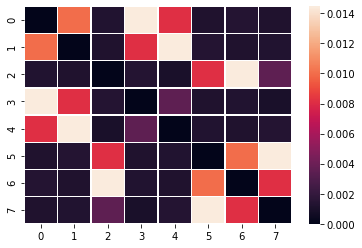

In [37]:
fig = sns.heatmap(V_e_e_oper, linewidth=0.5)
plt.savefig('CO_O_Ru_V_e_e.png',dpi=300)

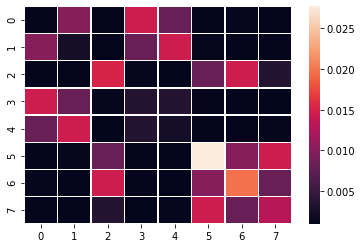

In [38]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper
fig = sns.heatmap(H_oper, linewidth=0.5)
plt.savefig('CO_O_Ru_H.png',dpi=300)

In [39]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)


eigenvalues:  [ 0.05123424  0.0307499  -0.01360595 -0.01170679  0.01886842  0.00568605
  0.00302081  0.00129155]


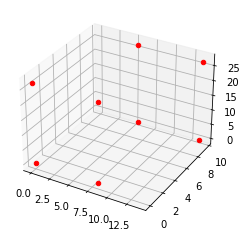

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting the points
for p in vertices:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')


[-0.0200328  -0.05076468  1.         -0.0048511  -0.05418639 -1.02492734
  0.98209515 -0.60467727]
[-0.0200328  -0.05076468  1.         -0.0048511  -0.05418639 -1.02492734
  0.98209515 -0.60467727]


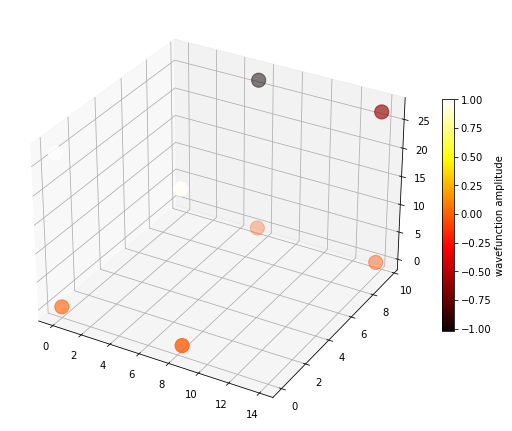

In [41]:

#fig = plt.figure(figsize=(8,6))

#ax = fig.add_subplot(111,projection='3d')
#colmap = cm.ScalarMappable(cmap=cm.hsv)
#colmap.set_array(v[:,4])

#print(v[:,4])
#print(max(v[:,4]))
#colors = cm.hsv(v[:,4]/max(v[:,4]))
#print(colors)

#yg = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=colors, marker='o')
#cb = fig.colorbar(colmap)

# creating figures
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# setting color bar
#color_map = cm.ScalarMappable(cmap=cm.hot)
#color_map.set_array(v[:,4]/max(v[:,4]))
colors = v[:,4]/max(v[:,4])

print(v[:,4]/max(v[:,4]))
print(colors)

# creating the heatmap
map_1 = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c = colors,cmap='hot',s=200)

cbar = plt.colorbar(map_1,fraction=0.026, pad=0.04)
cbar.set_label('wavefunction amplitude')
plt.show()
fig.savefig('CO_O_Ru_wavefunc.png',dpi=300)